In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

#Load titanic dataset
titanic = sns.load_dataset("titanic")

#Display first few rows
print(titanic.head())

#check for missing values
print("\nMissing Values:\n",titanic.isnull().sum())

# Fill missing age values with the median
titanic["age"].fillna(titanic["age"].median(), inplace = True)

# Drop rows with missing 'embarked' or 'deck' values
titanic.dropna(subset=["embarked","deck"], inplace = True)

#confirm missing values have been handled
print("\nMissing values after handling:\n", titanic.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male 

C:\Users\lucky\AppData\Local\Temp\ipykernel_5152\1789783170.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].median(), inplace = True)


In [2]:
#create family_size column
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

#Create is_alone column(If family_size is 1, set is_alone to 1 (True). Otherwise, set it to 0 (False).)
titanic["is_alone"] = (titanic["family_size"] == 1).astype(int)#astype(int) Converts True to 1 and False to 0.

#display the updated dataset
print(titanic[["sibsp", "parch", "family_size", "is_alone"]].head())

    sibsp  parch  family_size  is_alone
1       1      0            2         0
3       1      0            2         0
6       0      0            1         1
10      1      1            3         0
11      0      0            1         1


In [3]:
# Group by family size and calculate survival rate
survival_by_family_size = titanic.groupby("family_size")["survived"].mean() * 100
print("survival by family size:\n", survival_by_family_size)

survival by family size:
 family_size
1     58.241758
2     74.242424
3     72.413793
4     77.777778
5    100.000000
6     50.000000
Name: survived, dtype: float64


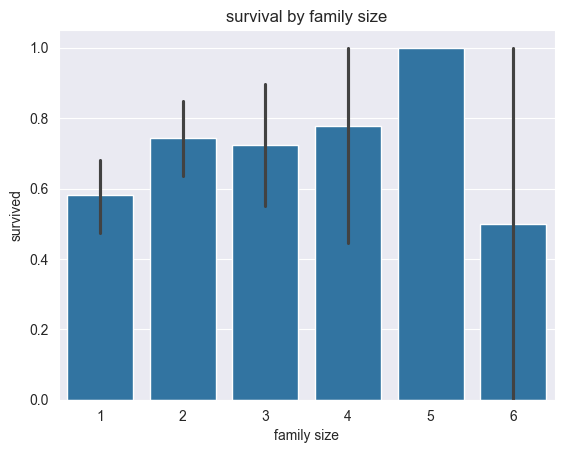

In [4]:
#visualize this rate of survival by family size
sns.barplot(data=titanic, x="family_size", y="survived")
plt.title("survival by family size")
plt.xlabel("family size")
plt.ylabel("survived")
plt.show()

In [5]:
# Survival rate by 'is_alone'
survival_by_is_alone = titanic.groupby("is_alone")["survived"].mean() * 100
print("\nsurvival rate for passengers travelling alone:\n", survival_by_is_alone)


survival rate for passengers travelling alone:
 is_alone
0    73.636364
1    58.241758
Name: survived, dtype: float64


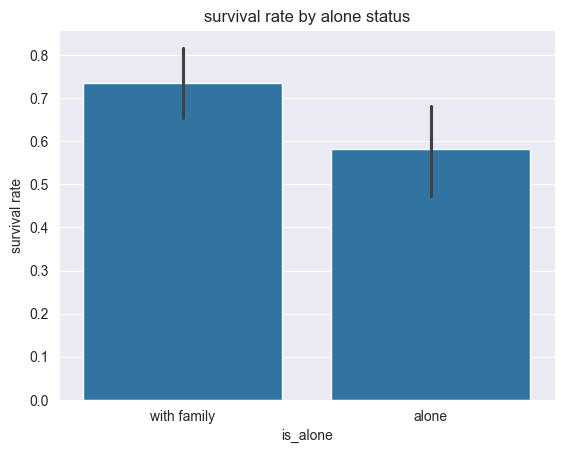

In [6]:
#visualize this rate of survival of passengers travelling alone
sns.barplot(data=titanic, x="is_alone", y="survived")
plt.title("survival rate by alone status")
plt.xticks([0,1], ["with family", "alone"])
plt.ylabel("survival rate")
plt.show()

In [7]:
import pandas as pd
# Create fare categories
titanic["fare_category"] = pd.cut(titanic["fare"], bins=[0, 10, 30, 70, 100, 600], labels=["very low", "low", "medium", "high", "very high"])

#Analyze survival rate by fare category
fare_survival_rate = titanic.groupby("fare_category")["survived"].mean() * 100
print("\nsurvival rate by fare category:\n", fare_survival_rate)


survival rate by fare category:
 fare_category
very low     16.666667
low          66.000000
medium       63.793103
high         78.048780
very high    72.093023
Name: survived, dtype: float64


C:\Users\lucky\AppData\Local\Temp\ipykernel_5152\2194451664.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = titanic.groupby("fare_category")["survived"].mean() * 100


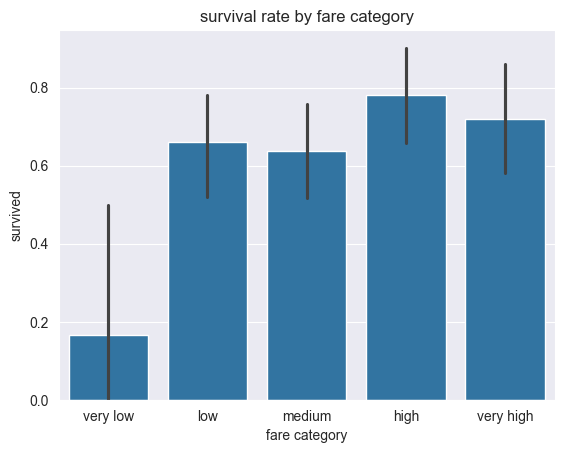

In [8]:
#visualize this survival rate by fare
sns.barplot(data=titanic, x="fare_category", y="survived")
plt.title("survival rate by fare category")
plt.xlabel("fare category")
plt.ylabel("survived")
plt.show()

In [9]:
# Analyze survival rate by embarkation point
embarked_survival_rate = titanic.groupby("embarked")["survived"].mean() * 100
print("\n survival rate by embarkation point:\n", embarked_survival_rate)


 survival rate by embarkation point:
 embarked
C    75.362319
Q    50.000000
S    62.500000
Name: survived, dtype: float64


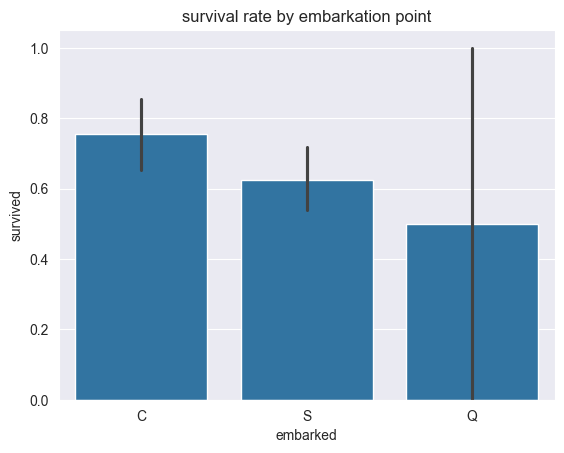

In [10]:
#visualize this survival rate by embarkation point
sns.barplot(data=titanic, x="embarked", y="survived")
plt.title("survival rate by embarkation point")
plt.xlabel("embarked")
plt.ylabel("survived")
plt.show()

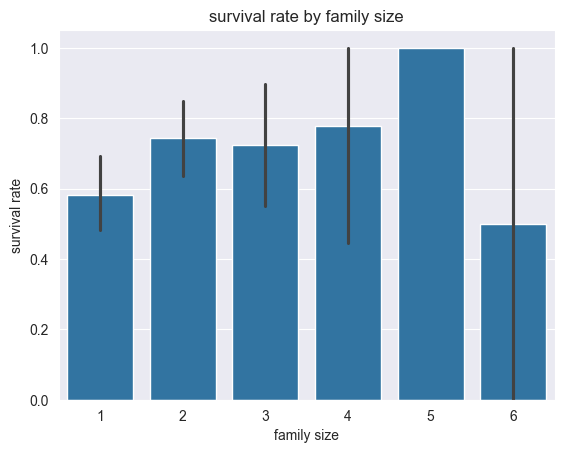

In [11]:
#Advanced Visualizations
#bar plot for survival rate by family size
sns.barplot(data=titanic, x="family_size", y="survived")
plt.title("survival rate by family size")
plt.xlabel("family size")
plt.ylabel("survival rate")
plt.show()

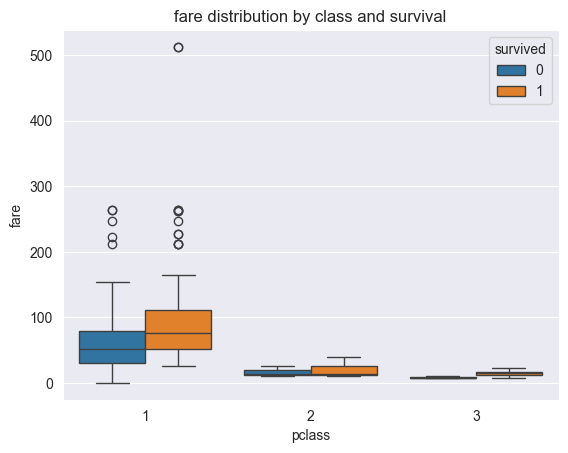

In [12]:
#Advanced Visualizations
#Box plot for fare distribution by class and survival
sns.boxplot(data=titanic, x="pclass", y="fare", hue="survived")
plt.title("fare distribution by class and survival")
plt.xlabel("pclass")
plt.ylabel("fare")
plt.show()

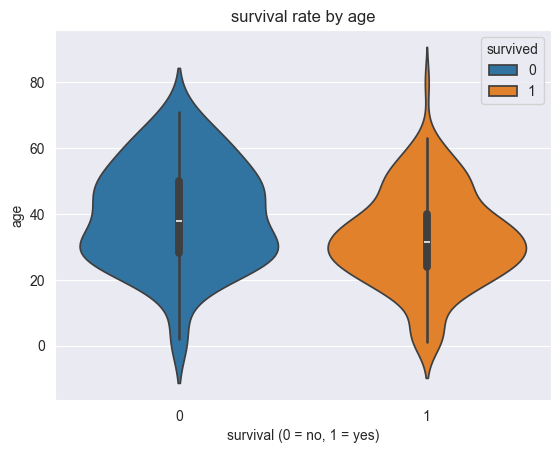

In [14]:
#Advanced Visualizations
# violin plot for age distribution by survival
sns.violinplot(data=titanic, x="survived", y="age", hue="survived")
plt.title("survival rate by age")
plt.xlabel("survival (0 = no, 1 = yes)")
plt.ylabel("age")
plt.show()

In [16]:
#Feature Engineering
#create is alone feature(1 is alone 0 if not)
titanic["is_alone"] = (titanic["family_size"] == 1).astype(int)

#display the first few rows to confirm the new feature
print(titanic[["is_alone", "family_size"]].head())

    is_alone  family_size
1          0            2
3          0            2
6          1            1
10         0            3
11         1            1


In [17]:
#analyze survival rates by is alone
survival_alone = titanic.groupby("is_alone")["survived"].mean() * 100
print("\nsurvival rate by is alone: \n", survival_alone)


survival rate by is alone: 
 is_alone
0    73.636364
1    58.241758
Name: survived, dtype: float64


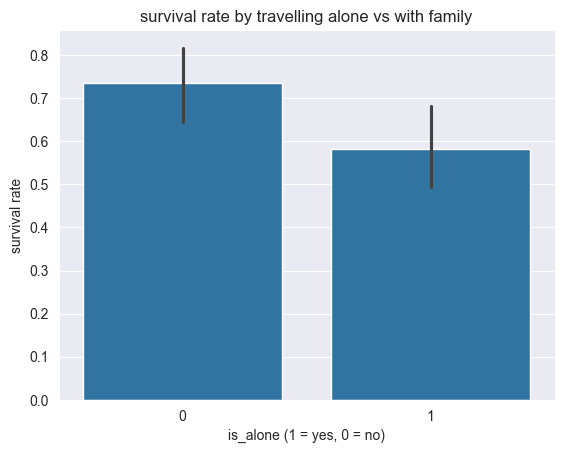

In [18]:
# Bar plot for survival by 'is_alone'
sns.barplot(data=titanic, x="is_alone", y="survived")
plt.title("survival rate by travelling alone vs with family")
plt.xlabel("is_alone (1 = yes, 0 = no)")
plt.ylabel("survival rate")
plt.show()